In [1]:
import pandas as pd, numpy as np, glob
from Bio.Seq import Seq
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
rhopath = '../GENOTYPE/DATA/CNC06490-t26_1.csv.gz'
rho = pd.read_csv(rhopath,index_col=0)

if rho.Strand.max()<0:
    rho = rho[::-1]
    
rho['Zeropos'] = np.abs(rho.Pos - rho.Pos.tolist()[0])+1

rho.head()

,Pos,Ref,Alt,Isvar,Strand,Type,Phase,Gene,Sample,Zeropos
3897,1896258,A,A,0,-1,5,-1,CNC06490-t26_1,Stock1,1
3896,1896257,A,A,0,-1,5,-1,CNC06490-t26_1,Stock1,2
3895,1896256,T,T,0,-1,5,-1,CNC06490-t26_1,Stock1,3
3894,1896255,G,G,0,-1,5,-1,CNC06490-t26_1,Stock1,4
3893,1896254,A,A,0,-1,5,-1,CNC06490-t26_1,Stock1,5


In [3]:
ref = Seq(''.join(rho[(rho.Type==0)].Ref.tolist())).complement()
refaa = ref.translate()
list(refaa).count('*'),len(refaa)

(1, 997)

In [4]:
alt = Seq(''.join(rho[(rho.Type==0)].Alt.tolist())).complement()
altaa = alt.translate()
list(altaa).count('*'),len(altaa)

(1, 997)

In [5]:
difix = np.min([i for i,j in enumerate(refaa) if j != altaa[i]])
difix

557

In [6]:
na = 3
refaa[difix-na:difix+na],altaa[difix-na:difix+na]

(Seq('LFKPYL'), Seq('LFKSYL'))

In [7]:
snpdf = rho[(rho.Isvar!=0)]
snpdf

,Pos,Ref,Alt,Isvar,Strand,Type,Phase,Gene,Sample,Zeropos
0,1894056,G,A,1,-1,0,2,CNC06490-t26_1,Stock1,2203


In [8]:
cds = rho[(rho.Type==0)].copy()
cds['Refaa'] = np.concatenate([np.repeat(a,3) for a in refaa])
cds['Altaa'] = np.concatenate([np.repeat(a,3) for a in altaa])

In [9]:
cds[(cds.Refaa!=cds.Altaa)]

,Pos,Ref,Alt,Isvar,Strand,Type,Phase,Gene,Sample,Zeropos,Refaa,Altaa
0,1894056,G,A,1,-1,0,2,CNC06490-t26_1,Stock1,2203,P,S
1694,1894055,G,G,0,-1,0,2,CNC06490-t26_1,Stock1,2204,P,S
1693,1894054,T,T,0,-1,0,2,CNC06490-t26_1,Stock1,2205,P,S


In [10]:
to_plot = cds[(cds.Zeropos>=2197) & (cds.Zeropos<=2217) ]
to_plot.head()

,Pos,Ref,Alt,Isvar,Strand,Type,Phase,Gene,Sample,Zeropos,Refaa,Altaa
1701,1894062,A,A,0,-1,0,2,CNC06490-t26_1,Stock1,2197,F,F
1700,1894061,A,A,0,-1,0,2,CNC06490-t26_1,Stock1,2198,F,F
1699,1894060,G,G,0,-1,0,2,CNC06490-t26_1,Stock1,2199,F,F
1698,1894059,T,T,0,-1,0,2,CNC06490-t26_1,Stock1,2200,K,K
1697,1894058,T,T,0,-1,0,2,CNC06490-t26_1,Stock1,2201,K,K


In [11]:
aadf = pd.read_csv('../GENOTYPE/DATA/AA_color_df.csv.gz',
                   index_col=0).T
aadf[18] = ['K','tab:blue']
aadf = aadf.T
aadf.tail()

,AA,Color
14,S,#1881DD
15,T,#1A1DE2
16,V,#95CE53
17,Y,#232273
18,K,tab:blue


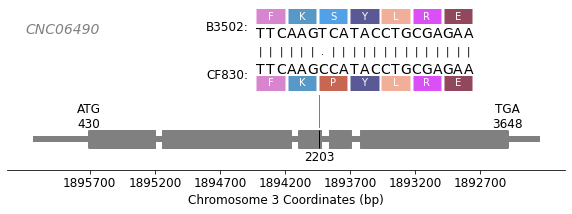

In [12]:
fig, ax = plt.subplots(1,1,figsize=(10,3))
fig.set_facecolor('w')

## Plot gene body
plt.hlines(0,rho.Zeropos.min(),rho.Zeropos.max(),
           color='grey',linewidth=6);

## Plot introns
#cds = rho[(rho.Type==0)]
for i,j in cds.iterrows():
    plt.vlines(j.Zeropos,-1,1,color='grey',
               alpha=1,linewidth=1)
    
## Plot variants  
gvs = rho[(rho.Isvar==1)]
for i,j in gvs.iterrows():
    if j.Ref!=j.Alt:
        plt.vlines(j.Zeropos,-1,1,
                   color='k',linewidth=1)
        
## Plot sequences        
x = 1750
ys = 0.7
y1 = 8
y2 = y1+2.5
tw = 80
xpad = 30

plotpos = []
for i,(ri,p) in enumerate(to_plot.iterrows()):
    
    xp = x+(i*tw)
    plotpos.append(xp)
    plt.text(xp,y=y1+ys,s=Seq(p.Ref).complement(),
             fontsize=14,
             color='k',
             va='top',ha='center')
    
    plt.text(xp,y=y2+ys,s=Seq(p.Alt).complement(),
             fontsize=14,
             color='k',
             va='bottom',ha='center')
    
    plt.text(xp,y=(y1+((y2-y1)/2))+ys+0.02,
             s='|' if p.Alt==p.Ref else '.',
             fontsize=10,
             color='k',
             va='center',ha='center')

for i,a in enumerate(to_plot.Refaa.unique()):

    plt.hlines(y1-1.6,plotpos[::3][i]-xpad,
               plotpos[2::3][i]+xpad,
               linewidth=15,alpha=0.75,
               color=aadf[(aadf.AA==a)].Color)
    plt.text(plotpos[1::3][i],y=y1-1.6,s=a,
             color='w',va='center',ha='center')
    
for i,a in enumerate(to_plot.Altaa.unique()):

    plt.hlines(y2+3.4,plotpos[::3][i]-xpad,
               plotpos[2::3][i]+xpad,
               linewidth=15,alpha=0.75,
               color=aadf[(aadf.AA==a)].Color)
    plt.text(plotpos[1::3][i],y=y2+3.4,s=a,
             color='w',va='center',ha='center')
    
x_xp,x_xl = plt.xticks()
pos = rho[(rho.Zeropos.isin(x_xp[(x_xp>=500) & 
          (x_xp<=rho.Zeropos.max())]))].Pos.values
zeropos = rho[(rho.Zeropos.isin(x_xp[(x_xp>=500) & 
          (x_xp<=rho.Zeropos.max())]))].Zeropos.values

newxmod = int(str(pos[0])[-2:])

plt.xticks(zeropos-newxmod , pos-newxmod ,fontsize=12)
plt.xlabel('Chromosome 3 Coordinates (bp)',fontsize=12)

plt.text(431,2.5,'ATG\n430',va='center',ha='center',fontsize=12)
plt.text(3649,2.5,'TGA\n3648',va='center',ha='center',fontsize=12)

plt.ylim(-3.5,15);



## Turn off top, left and right spines
[ax.spines[a].set_visible(False) for a in ['top','left','right']]
plt.yticks([])

plt.text(1500,y1,'CF830:',
         fontsize=12,
         va='top',ha='center')
plt.text(1500,y2+1.5,'B3502:',
         fontsize=12,
         va='bottom',ha='center')
plt.text(2203,-2,'2203',va='center',ha='center',fontsize=12)

plt.plot([2203,2203],[1.3,y1-3],color='k',alpha=0.5,linewidth=1)

plt.title('CNC06490',x=0.1,y=0.8,fontstyle='italic',color='grey',fontsize=14)


plt.savefig('../FIGURES/SHENG_B3502_Figure4_QTGs_A_CNC06490.png',
            dpi=400,bbox_inches='tight');

In [13]:
assert np.max([np.unique([len(a) for a in rho.Ref]),np.unique([len(a) for a in rho.Alt])])==1

In [14]:
rho[(rho.Isvar!=0)]

,Pos,Ref,Alt,Isvar,Strand,Type,Phase,Gene,Sample,Zeropos
0,1894056,G,A,1,-1,0,2,CNC06490-t26_1,Stock1,2203
